# Supplemental Data Cleaning: Using a Lemmatizer

### Test out WordNet lemmatizer (read more about WordNet [here](https://wordnet.princeton.edu/))

In [ ]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [ ]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [ ]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [ ]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


In [ ]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [ ]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


### Read in raw text

In [ ]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)

stopwords = nltk.corpus.stopwords.words('english')

da = pd.read_excel(r'C:/Users/HP/Downloads/HospitalsApolloNew.xlsx')
da['text']=da['text'].astype(str)
dfnew=pd.DataFrame(da[1:3199],columns=['text'])

dfnew1=dfnew.dropna()
dfnew1.head()

,text
1,RT @preethareddy28: Kudos to the Health Ministry’s telemedicine platform for 100K+ consultations...
2,"@fajur_rahim Hi Sir, We’d like to connect with you. Please share your contact number and email I..."
3,"Having too much body fat can lead to obesity, diabetes, or hypertension. Can you tell us in whic..."
4,@RandomRantzzz We would like to look into this. Please share your relevant details via the link ...
5,#Drug or substance addiction can damage your brain permanently by taking away your ability to th...


### Clean up text

In [ ]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

dfnew1['text'] = dfnew1['text'].apply(lambda x: clean_text(x.lower()))
dfnew1.head()

,text
1,"[rt, preethareddy28, kudos, health, ministry, telemedicine, platform, 100k, consultations, heart..."
2,"[fajurrahim, hi, sir, like, connect, please, share, contact, number, email, id, us, assist, earl..."
3,"[much, body, fat, lead, obesity, diabetes, hypertension, tell, us, place, httpstcoyzqyb6x6um]"
4,"[randomrantzzz, would, like, look, please, share, relevant, details, via, link, httpstcoisxil44olk]"
5,"[drug, substance, addiction, damage, brain, permanently, taking, away, ability, think, focus, ht..."


### Lemmatize text

In [ ]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

dfnew1['text'] = dfnew1['text'].apply(lambda x: lemmatizing(x))

dfnew1.head(100)

,text
1,"[rt, preethareddy28, kudos, health, ministry, telemedicine, platform, 100k, consultation, hearte..."
2,"[fajurrahim, hi, sir, like, connect, please, share, contact, number, email, id, u, assist, earli..."
3,"[much, body, fat, lead, obesity, diabetes, hypertension, tell, u, place, httpstcoyzqyb6x6um]"
4,"[randomrantzzz, would, like, look, please, share, relevant, detail, via, link, httpstcoisxil44olk]"
5,"[drug, substance, addiction, damage, brain, permanently, taking, away, ability, think, focus, ht..."
...,...
96,"[mentalhealth, major, unspoken, factor, everyone, life, state, mind, important, yo, httpstcovnjo..."
97,"[rt, preethareddy28, 2020, always, remembered, heroism, healthcare, worker, across, world, thank..."
98,"[thewalkerza, thank, apollo, hospital, love, hearing, service, make, customer, happy, team, wi, ..."
99,"[benkaljayasri, thank, appreciating, effort, strive, keep, environment, clean, germ, free, h, ht..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:

count_new = CountVectorizer(min_df=1,max_features=50000,analyzer=lemmatizing)

In [ ]:
xcoun=count_new.fit_transform(dfnew1['text'])

In [ ]:
print(xcoun.shape)

(3198, 8751)


In [ ]:
print(count_new.get_feature_names())


['', '01kumarsonu', '1', '10', '1000', '100calorie', '100k', '1066', '10monthold', '10th', '1130', '116900', '1200', '125', '12vinoddd', '13', '13th', '14', '144', '14th', '15', '150', '1500', '150th', '15th', '16', '1600', '16th', '16yrs', '17th', '18', '18005001066', '18ashishg', '19', '1998', '19trigmansu', '1st', '2', '20', '200', '200000', '200mg', '200th', '2013', '2019', '2019ncov', '202', '2020', '2020who', '208', '20minute', '20th', '21st', '22', '22nd', '230pm', '247', '24th', '25', '2500', '250000', '26', '264', '28th', '29th', '2day', '2nd', '2pm', '2u270bco', '2u2b06ufe0fisolation', '3', '30', '300', '300pm', '30yearsu0001f630', '35', '3500', '36', '360degree', '39', '3f08829b315d4cf', '3rd', '3year', '4', '40000', '420slap', '430pm', '43837d308dc84d7', '48', '4th', '5', '50', '5000', '500000', '52', '530', '55year', '5th', '6', '60', '621sivaprasad', '6m', '6th', '70', '700', '7000', '70th', '71000', '74', '785', '7yearold', '8', '80', '81yearold', '87yearold', '888555san

In [ ]:
xcoun_new= pd.DataFrame(xcoun.toarray())

In [ ]:
xcoun_new

,0,1,2,3,4,5,6,7,8,9,...,8741,8742,8743,8744,8745,8746,8747,8748,8749,8750
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3194,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
xcoun_new.columns= count_new.get_feature_names()
xcoun_new

,,01kumarsonu,1,10,1000,100calorie,100k,1066,10monthold,10th,...,zambaremohan,zee24ghanta,zeeshan49901799,zero,zerosorrytogive,zinc,zipline,zissu42,zoonosesinfectious,zoonotic
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3194,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=5, random_state=10)
LDA.fit(xcoun_new)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=10, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [ ]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_new.get_feature_names()))
    print(count_new.get_feature_names()[random_id])

narreddy
httpstcojhggiwswkg
kotireddy219
modern
eidmubarak2020
eidmubarak
httpstco9mmfvspydh
alliance
httpstcoicj9tptigo
usage


In [ ]:
first_topic = LDA.components_[0]

In [ ]:
top_topic_words = first_topic.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(count_new.get_feature_names()[i])

liver
drsangitareddy
india
hospitalsapollo
healersofindia
covid19
winner
health

rt


In [ ]:
for i,topic in enumerate(LDA.components_):
    print(f'Top words for topic #{i}:')
    print([count_new.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top words for topic #0:
['liver', 'drsangitareddy', 'india', 'hospitalsapollo', 'healersofindia', 'covid19', 'winner', 'health', '', 'rt']


Top words for topic #1:
['get', 'team', 'contact', 'u', 'would', 'like', 'look', 'share', 'detail', 'please']


Top words for topic #2:
['reddy', 'covid19', '', 'rt', 'amp', 'discussion', 'watch', 'hospital', 'dr', 'apollo']


Top words for topic #3:
['healthy', 'dr', 'make', 'reddy', '', 'rt', 'heart', 'health', 'hospital', 'apollo']


Top words for topic #4:
['team', 'hi', 'sincerest', 'apology', 'inconvenience', 'caused', 'request', 'share', 'contact', 'detail']




In [ ]:
lda.show_topics()

[(0,
  '0.025*"hello" + 0.018*"rt" + 0.017*"" + 0.013*"apollo" + 0.013*"hospital" + 0.011*"dr" + 0.008*"winner" + 0.007*"happy" + 0.006*"c" + 0.006*"reddy"'),
 (1,
  '0.048*"detail" + 0.046*"share" + 0.043*"please" + 0.043*"u" + 0.040*"contact" + 0.035*"like" + 0.035*"look" + 0.034*"would" + 0.021*"team" + 0.018*"get"'),
 (2,
  '0.062*"detail" + 0.045*"contact" + 0.045*"please" + 0.041*"share" + 0.040*"team" + 0.039*"get" + 0.030*"u" + 0.029*"hi" + 0.028*"look" + 0.026*"like"'),
 (3,
  '0.021*"detail" + 0.019*"caused" + 0.019*"inconvenience" + 0.016*"share" + 0.015*"contact" + 0.013*"request" + 0.013*"apollo" + 0.011*"team" + 0.010*"hospital" + 0.010*"forwarded"'),
 (4,
  '0.039*"caused" + 0.038*"inconvenience" + 0.036*"share" + 0.036*"request" + 0.035*"apology" + 0.034*"sincerest" + 0.031*"contact" + 0.029*"detail" + 0.009*"hi" + 0.009*"sorry"')]

In [ ]:
topic_values = LDA.transform(xcoun_new)
topic_values.shape

ValueError: The provided data has 8752 dimensions while the model was trained with feature size 8751.

In [ ]:
xcoun_new['Topic'] = topic_values.argmax(axis=1)

In [ ]:
xcoun_new.head()

,,01kumarsonu,1,10,1000,100calorie,100k,1066,10monthold,10th,...,zee24ghanta,zeeshan49901799,zero,zerosorrytogive,zinc,zipline,zissu42,zoonosesinfectious,zoonotic,Topic
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from gensim.models.hdpmodel import HdpModel


In [ ]:
from gensim.corpora.dictionary import Dictionary

In [ ]:
journals_dictionary = Dictionary(dfnew1['text'])

In [ ]:

journals_corpus = [journals_dictionary.doc2bow(text) for text in dfnew1['text']]

In [ ]:
hdp = HdpModel(corpus=journals_corpus,id2word=journals_dictionary)

In [ ]:

hdp_topics = hdp.print_topics()
for topic in hdp_topics:
  print(topic)

(0, '0.018*detail + 0.014*share + 0.014*contact + 0.011*please + 0.009*u + 0.008*look + 0.008*like + 0.008*would + 0.007*get + 0.007*team')
(1, '0.014*detail + 0.014*please + 0.012*share + 0.011*like + 0.011*contact + 0.011*look + 0.010*would + 0.009*u + 0.009*team + 0.009*get')
(2, '0.004*detail + 0.004*share + 0.004*caused + 0.004*inconvenience + 0.004*please + 0.003*contact + 0.003*apology + 0.003*sincerest + 0.002*request + 0.002*u')
(3, '0.004*detail + 0.004*please + 0.004*contact + 0.004*share + 0.003*like + 0.003*u + 0.003*look + 0.003*would + 0.003*get + 0.002*team')
(4, '0.005*share + 0.005*detail + 0.003*contact + 0.002*please + 0.002*look + 0.002*would + 0.002*via + 0.002*like + 0.002*inconvenience + 0.002*request')
(5, '0.004*detail + 0.004*share + 0.004*contact + 0.003*please + 0.002*like + 0.002*would + 0.002*look + 0.002*u + 0.002*request + 0.002*inconvenience')
(6, '0.005*please + 0.005*detail + 0.004*look + 0.004*like + 0.004*share + 0.004*contact + 0.004*u + 0.004*wou

NameError: name 'count' is not defined

In [ ]:
!pip install pyLDAvis

In [ ]:
from gensim.models.ldamodel import LdaModel
lda = LdaModel(journals_corpus,num_topics=4,id2word=journals_dictionary,random_state=0)
import pyLDAvis.gensim                             #Play around with the interactive pyLDAvis image
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, journals_corpus, journals_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.127134  0.008928       1        1  27.697193
1      0.100968  0.054143       2        1  26.795759
3     -0.038992 -0.123431       3        1  25.240952
0     -0.189111  0.060360       4        1  20.266096, topic_info=              Term        Freq       Total Category  logprob  loglift
115         caused  397.000000  397.000000  Default  30.0000  30.0000
346  inconvenience  384.000000  384.000000  Default  29.0000  29.0000
23          please  839.000000  839.000000  Default  28.0000  28.0000
40            look  583.000000  583.000000  Default  27.0000  27.0000
26               u  690.000000  690.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
81         concern   29.388838  124.893799   Topic4  -5.5376   0.1494
115         caused   39.287094  397.240906   Topic4  -5.2473  -0.7174
105        disease   23.298723   58.978088   Topic4  -5.7698   0.6675
346  inconvenience   34.074871  384.452118   Topic4  -5.3896  -0.8270
157          heart   22.932003   78.322617   Topic4  -5.7857   0.3679

[283 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.112186       
0         2  0.106844       
0         3  0.149581       
0         4  0.625037       
2312      1  0.078264      1
...     ...       ...    ...
44        3  0.031508  would
44        4  0.003707  would
1849      2  0.053329   year
1849      3  0.773276   year
1849      4  0.159988   year

[526 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 1])

In [ ]:

import pyLDAvis.gensim                             #Play around with the interactive pyLDAvis image
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(hdp, journals_corpus, journals_dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.126720  0.029209       1        1  30.752514
1     -0.115358 -0.014011       2        1  18.678545
7     -0.009211 -0.027982       3        1   3.623760
2     -0.057008  0.012163       4        1   2.044303
26     0.017160 -0.024443       5        1   1.912783
...         ...       ...     ...      ...        ...
109    0.022363 -0.013013     146        1   0.051409
99     0.018333  0.009504     147        1   0.046976
96     0.006777  0.011551     148        1   0.043879
128    0.016894 -0.003932     149        1   0.030788
116    0.010657  0.014745     150        1   0.017976

[150 rows x 5 columns], topic_info=                    Term        Freq       Total  Category  logprob  loglift
37                detail  317.000000  317.000000   Default  30.0000  30.0000
24                 share  263.000000  263.000000   Default  29.0000  29.0000
15               contact  251.000000  251.000000   Default  28.0000  28.0000
23                please  236.000000  236.000000   Default  27.0000  27.0000
21                  like  181.000000  181.000000   Default  26.0000  26.0000
...                  ...         ...         ...       ...      ...      ...
6993           funfilled    0.004194    3.697138  Topic150  -7.3646   1.8423
1572             magical    0.004300    6.181484  Topic150  -7.3396   1.3532
37                detail    0.005314  317.217859  Topic150  -7.1280  -2.3731
6465  httpstcokz0himecdh    0.004315    6.598884  Topic150  -7.3361   1.2914
3029             prevent    0.004306    7.161114  Topic150  -7.3383   1.2075

[7527 rows x 6 columns], token_table=      Topic      Freq          Term
term                               
0         2  0.229288              
0         3  0.114644              
2312      1  0.253071             1
2312      2  0.253071             1
3262      1  0.242797            10
...     ...       ...           ...
2605      1  0.379677            yu
2632      1  0.798520         yummy
2395      2  0.360556  zambaremohan
5319      1  0.371256       zissu42
1361      2  0.388694      zoonotic

[4494 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 8, 3, 27, 12, 41, 9, 7, 31, 46, 111, 136, 20, 4, 10, 101, 19, 76, 43, 13, 15, 28, 24, 87, 5, 11, 96, 17, 50, 81, 6, 18, 21, 59, 51, 107, 55, 26, 14, 78, 85, 95, 70, 124, 33, 105, 56, 91, 30, 69, 45, 116, 99, 25, 108, 120, 54, 66, 32, 140, 92, 94, 44, 16, 57, 63, 29, 126, 134, 84, 150, 104, 36, 93, 142, 64, 88, 72, 77, 106, 52, 86, 23, 71, 145, 49, 42, 47, 80, 90, 122, 22, 144, 40, 83, 127, 37, 118, 89, 149, 74, 60, 114, 132, 65, 39, 143, 73, 48, 53, 75, 133, 109, 67, 58, 141, 135, 103, 61, 137, 113, 128, 121, 82, 102, 123, 148, 79, 138, 131, 68, 38, 98, 125, 146, 130, 147, 112, 119, 62, 139, 35, 115, 34, 110, 100, 97, 129, 117])

In [ ]:

from gensim.models import CoherenceModel
lda_cm=CoherenceModel(model=lda,corpus=journals_corpus,dictionary=journals_dictionary,texts= dfnew1['text'],coherence='c_v')
LDA_cm=lda_cm.get_coherence()
LDA_cm

0.4168343415620055

In [ ]:
hdp_cm=CoherenceModel(model=hdp,corpus=journals_corpus,dictionary=journals_dictionary,texts= dfnew1['text'],coherence='c_v')
HDP_cm=hdp_cm.get_coherence()
HDP_cm

0.6805060306764944

In [ ]:

coherence = {'LDA_cm':0.4168,'HDP_cm':0.6805}

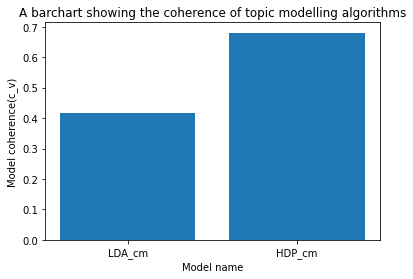

In [ ]:
import matplotlib.pyplot as plt
coherence_value = list(coherence.values())
model_name = list(coherence.keys())
plt.bar(range(len(model_name)),coherence_value,tick_label=model_name)
plt.title('A barchart showing the coherence of topic modelling algorithms')
plt.xlabel('Model name')
plt.ylabel('Model coherence(c_v)')
plt.show()

In [ ]:

def topic_prob_extractor(gensim_hdp):
    shown_topics = gensim_hdp.show_topics(num_topics=-1, formatted=False)
    topics_nos = [x[0] for x in shown_topics ]
    weights = [ sum([item[1] for item in shown_topics[topicN][1]]) for topicN in topics_nos ]

    return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights})

In [ ]:
topic_weights = topic_prob_extractor(hdp)

In [ ]:
topic_weights

,topic_id,weight


In [ ]:
def topic_prob_extractor1(hdp, t=-1, w=25, isSorted=True):

    hdp = HdpModel(corpus=journals_corpus,id2word=journals_dictionary)
    shown_topics = hdp.show_topics(num_topics=t, num_words=w ,formatted=False)
    topics_nos = [x[0] for x in shown_topics ]
    weights = [ sum([item[1] for item in shown_topics[topicN][1]]) for topicN in topics_nos ]
    if (isSorted):
        return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights}).sort_values(by = "weight", ascending=False);
    else:
        return pd.DataFrame({'topic_id' : topics_nos, 'weight' : weights});

In [ ]:
topic_weights1 = topic_prob_extractor1(hdp)

In [ ]:
topic_weights1

,topic_id,weight


TypeError: show_topics() got an unexpected keyword argument 'topics'

AttributeError: 'HdpModel' object has no attribute 'lda_e_step'

NameError: name 'gensim' is not defined